Amplitude Amplification

In [38]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_state_city, plot_bloch_multivector, plot_histogram
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit import IBMQ, Aer, transpile, execute
from scipy.fft import fft
from math import pi
from qiskit.quantum_info import Statevector
from IPython.display import display, Latex
from qiskit.circuit.library import QFT


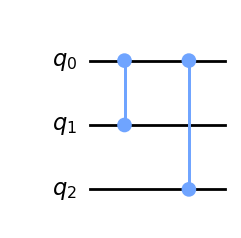

In [39]:
no_of_qubits = 3
no_of_search_space = 2**no_of_qubits

oracle = QuantumCircuit(no_of_qubits, name="oracle")

oracle.cz(0,1)
oracle.cz(0,2)
oracle.to_gate()

oracle.draw(output="mpl")

In [40]:
OracleTest = QuantumCircuit(3, name="OracleTest")
OracleTest.h([0, 1, 2])
OracleTest.append(oracle, [0,1,2])

state = Statevector(OracleTest)
state.draw(output="latex")


<IPython.core.display.Latex object>

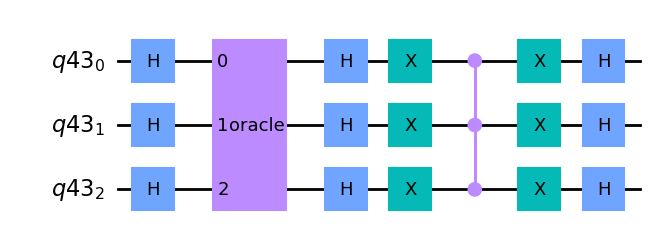

In [41]:
import operator
from qiskit import *
from qiskit.quantum_info.operators import Operator, Pauli


qreg = QuantumRegister(no_of_qubits)
creg = ClassicalRegister(no_of_qubits)
q = QuantumCircuit(qreg)

for i in range(no_of_qubits):
    q.h(i)

q.append(oracle, [0,1,2])

for i  in range(1):
    q.h(range(no_of_qubits))
    q.x(range(no_of_qubits))
    q.ccz(2,1,0)
    q.x(range(no_of_qubits))
    q.h(range(no_of_qubits))

q.draw(output="mpl")

Statevector([ 9.52035154e-17+9.72182535e-33j,
              5.55111512e-17-4.32978028e-17j,
             -1.58187870e-17-7.74897077e-33j,
             -7.07106781e-01-3.03084620e-16j,
             -1.58187870e-17-7.74897077e-33j,
             -7.07106781e-01-3.03084620e-16j,
             -1.26841090e-16-4.85379030e-32j,
             -1.66533454e-16-4.32978028e-17j],
            dims=(2, 2, 2))


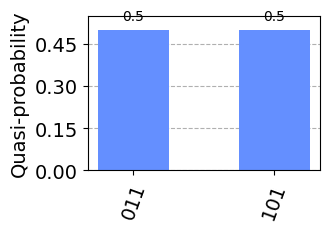

In [42]:
backend = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

q.save_statevector()   # Tell simulator to save statevector
result = backend.run(transpile(q, backend), shots=1000).result()
out_state = result.get_statevector()
np.around(out_state, 2)
print(out_state) # Display the output state vector
plot_histogram(result.get_counts(), figsize=(3,2))